In [1]:
from f_drosophila_infer import *
from f_train import *
from f_data_prep import *

In [2]:
data_all = np.loadtxt('../data_complete.txt')

In [3]:
gene_names = np.genfromtxt('../gene_names.txt', dtype='str')
gene_names[3:][::6][comp_ind]

array(['D_t1', 'Kr_t1', 'Traf1_t1', 'cad_t1', 'croc_t1', 'eve_t1',
       'fkh_t1', 'ftz_t1', 'gt_t1', 'h_t1', 'hb_t1', 'hkb_t1', 'kni_t1',
       'knrl_t1', 'odd_t1', 'prd_t1', 'rho_t1', 'slp1_t1', 'slp2_t1',
       'sna_t1', 'tll_t1', 'trn_t1', 'twi_t1', 'zen_t1', 'KrP_t1',
       'gtP_t1', 'hbP_t1'], dtype='<U11')

In [4]:
def simulation(X, n_split=2, n_bin=2):
    X_split = np.vsplit(X, n_split)
    stacks = np.copy(X_split[0])
    for i in range(n_split-1):
        diff = X_split[i+1] - X_split[i]
        diff_inc = diff/n_bin
        for j in range(1, n_bin):
            stacks = np.dstack((stacks, X_split[i]+j*(diff_inc)))
        stacks = np.dstack((stacks, X_split[i+1]))
    return stacks

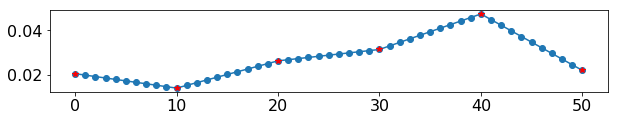

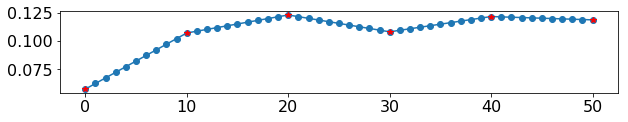

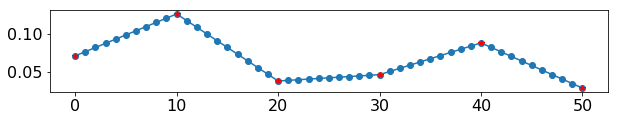

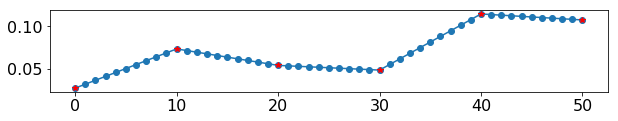

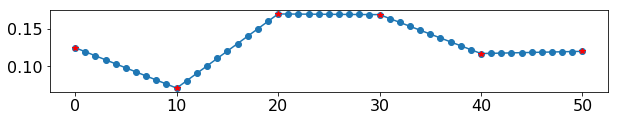

In [5]:
% matplotlib inline

n_bin = 10
stacks = simulation(data_all[:, comp_ind], n_split=6, n_bin=n_bin)

n = 5
cell = np.random.randint(6077, size=n)
gene = np.random.randint(26, size=n)
for c,g in zip(cell,gene):
    plt.figure(figsize=(10,1.5))
    plt.plot(range(5*n_bin+1), stacks[c,g,:],'o-')
    plt.plot(range(0,5*n_bin+1,n_bin), stacks[c,g,::n_bin],'r*')
    plt.show()

In [6]:
stacks.shape

(6078, 27, 51)

In [7]:
# % matplotlib notebook
# % matplotlib notebook
# from matplotlib.animation import FuncAnimation

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(13,6))
# ax=fig.add_subplot(111)
# ax.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
# scat=ax.scatter(xyz[:,0], xyz[:,2], c=stacks[:,1,0], cmap='viridis_r')
# plt.colorbar(scat, ax=ax)


# def animate(i):
#     color1 = stacks[:,1,i]
#     scat.set_array(color1)
#     ax.set_title('Frame' + str(i) + ' gene Kr')

# mywriter = matplotlib.animation.FFMpegWriter()
# anim = FuncAnimation(fig, animate, interval=400, frames=51)
# plt.draw()
# plt.show()

In [8]:
% matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
scat=ax.scatter(xyz[:,0], xyz[:,2], c=stacks[:,1,0], cmap='viridis_r')
plt.colorbar(scat, ax=ax)
ax.set_title('Frame 0, gene Kr')
ax.set_xlabel('x', fontsize=22)
ax.set_ylabel('z', fontsize=22)

plt.savefig('./movie_frames/pseudo_frame_0')
plt.close()

for i in range(1,51):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
    ax.scatter(xyz[:,0], xyz[:,2], c=stacks[:,1,i], cmap='viridis_r')
    plt.colorbar(scat, ax=ax)
    ax.set_title('Frame %s, gene Kr' %i)
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('z', fontsize=22)
    
    plt.savefig('./movie_frames/pseudo_frame_'+str(i))
    plt.close()